# Statistics is about studying "real" differences and relationships

In [ ]:
# @title Watch this video first!
from IPython.display import IFrame  # For displaying HTML content in Jupyter Notebooks
IFrame("https://www.youtube.com/embed/I10q6fjPxJ0?si=L4UM1uC5rqe3Q7Ex", width=560, height=315)

# Setup

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a toy dataset

In [ ]:
# --- Simulate the Data ---

np.random.seed(42)  # for reproducibility

n_per_group = 50  # Increased sample size for more reliable results
# Create data frames for males and females
males = pd.DataFrame({
    'Gender': ['Male'] * n_per_group,
    'Age group': np.random.choice(['Child', 'Adult', 'Elderly'], size=n_per_group, p=[0.2, 0.6, 0.2]),
    'Height': np.random.normal(loc=1.75, scale=0.1, size=n_per_group),  # Simulate heights around 1.75m
    'Weight': np.random.normal(loc=75, scale=10, size=n_per_group),  # Simulate weights
})

females = pd.DataFrame({
    'Gender': ['Female'] * n_per_group,
    'Age group': np.random.choice(['Child', 'Adult', 'Elderly'], size=n_per_group, p=[0.2, 0.6, 0.2]),
    'Height': np.random.normal(loc=1.62, scale=0.08, size=n_per_group),  # Simulate heights around 1.62m
    'Weight': np.random.normal(loc=65, scale=8, size=n_per_group),  # Simulate weights
})

# Combine dataframes
data = pd.concat([males, females], ignore_index=True)

# Introduce a correlation between height and weight
data['Weight'] = data['Weight'] + 15 * (data['Height'] - data['Height'].mean()) + np.random.normal(0, 5, size=len(data))


# Explore data

In [ ]:
data

,Gender,Age group,Height,Weight
0,Male,Adult,1.823847,85.948370
1,Male,Elderly,1.767137,79.694235
2,Male,Adult,1.738435,79.410974
3,Male,Adult,1.719890,62.451094
4,Male,Child,1.602148,69.042020
...,...,...,...,...
95,Female,Adult,1.533780,58.811492
96,Female,Adult,1.562776,74.638877
97,Female,Adult,1.674368,57.681327
98,Female,Child,1.561571,59.822900


In [ ]:
# prompt: describe data using descriptive statistics rounded at two decimals
data.describe().round(2)

,Height,Weight
count,100.00,100.00
mean,1.69,70.08
std,0.11,12.19
min,1.47,38.66
25%,1.62,61.05
50%,1.68,69.64
75%,1.76,78.27
max,1.93,99.36


In [ ]:
# prompt: descriptive statistics by gender using only two decimals

# Group data by gender and calculate descriptive statistics
gender_stats = data.groupby('Gender').agg({
    'Height': ['mean', 'std', 'min', 'max', 'median'],
    'Weight': ['mean', 'std', 'min', 'max', 'median']
}).round(2)

# Print or display the results
gender_stats


Height                          Weight                            
         mean   std   min   max median   mean    std    min    max median
Gender                                                                   
Female   1.62  0.08  1.47  1.93   1.63  63.80  10.31  38.66  86.56  64.29
Male     1.75  0.09  1.49  1.91   1.75  76.37  10.64  56.01  99.36  75.91

In [ ]:
# prompt: descriptive statistics by age group using only two decimals

# Group data by 'Age group' and calculate descriptive statistics
age_group_stats = data.groupby('Age group').agg({
    'Height': ['mean', 'std', 'min', 'max', 'median'],
    'Weight': ['mean', 'std', 'min', 'max', 'median']
}).round(2)

# Print or display the results
age_group_stats


Height                          Weight                            
            mean   std   min   max median   mean    std    min    max median
Age group                                                                   
Adult       1.69  0.10  1.47  1.93   1.67  70.46  11.98  38.66  99.36  70.02
Child       1.70  0.11  1.51  1.90   1.71  69.05  13.60  44.23  96.44  69.11
Elderly     1.66  0.12  1.49  1.91   1.67  70.23  11.42  52.24  97.53  66.89

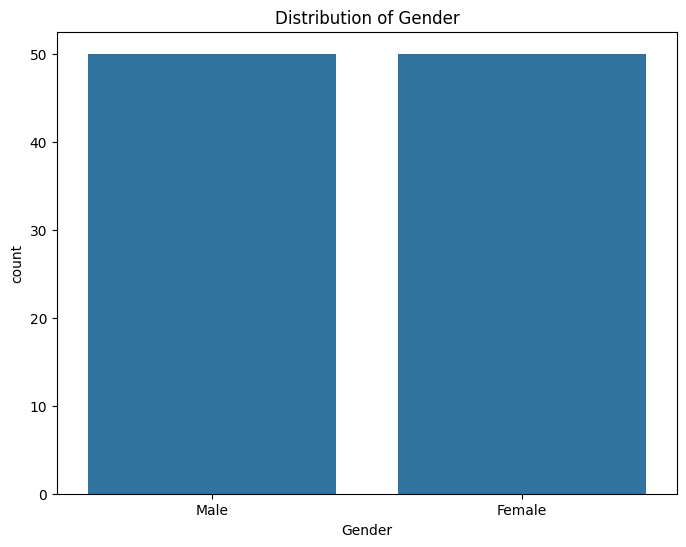

In [ ]:
# Bar chart for categorical data (Gender)
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.show()

<Figure size 800x600 with 0 Axes>

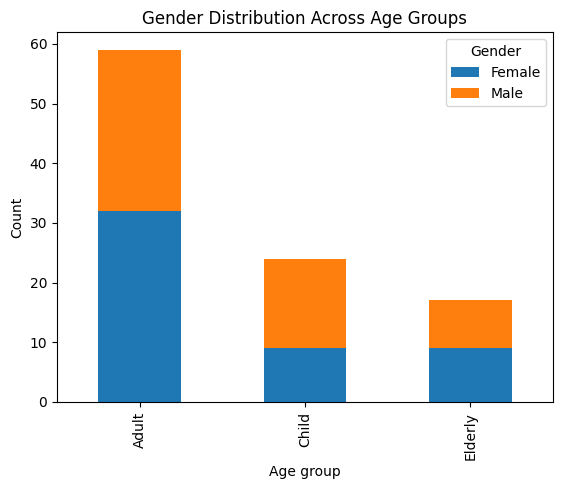

In [ ]:
# Stacked bar chart for two categorical variables (Gender and Age group)
plt.figure(figsize=(8, 6))
pd.crosstab(data['Age group'], data['Gender']).plot(kind='bar', stacked=True)
plt.title('Gender Distribution Across Age Groups')
plt.ylabel('Count')
plt.show()

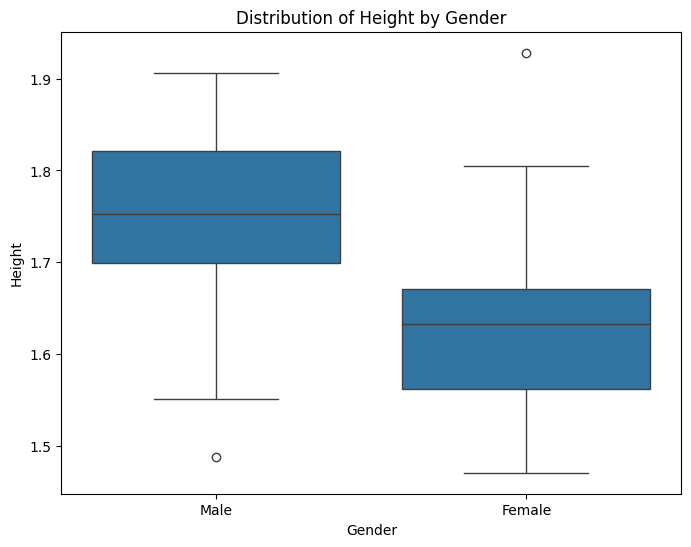

In [ ]:
# Side-by-side box plots (Height by Gender)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Height', data=data)
plt.title('Distribution of Height by Gender')
plt.show()

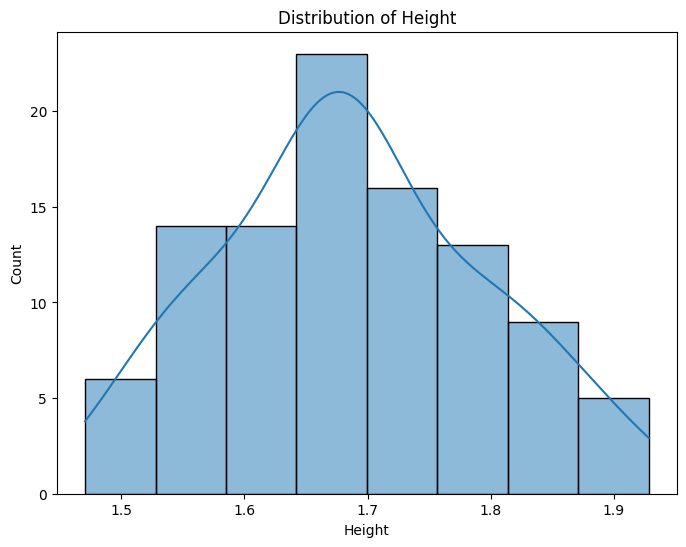

In [ ]:
# Histogram of Height
plt.figure(figsize=(8, 6))
sns.histplot(data['Height'], kde=True) # Added kde=True for a Kernel Density Estimate
plt.title('Distribution of Height')
plt.show()

# Define statistical tests

In [ ]:
# --- 1. One-Sample Proportion Test ---

def one_sample_proportion_test(data, category_column, category_value, hypothesized_proportion):
    """
    Performs a one-sample proportion test.

    Args:
        data: DataFrame containing the data.
        category_column: Name of the column with the categorical variable.
        category_value: The specific category value to test the proportion of.
        hypothesized_proportion:  The hypothesized proportion in the population.

    Returns:
        A tuple: (z-statistic, p-value)
    """
    sample_proportion = (data[category_column] == category_value).mean()
    n = len(data)
    z = (sample_proportion - hypothesized_proportion) / np.sqrt((hypothesized_proportion * (1 - hypothesized_proportion)) / n)
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))  # Two-tailed test

    print("\n--- One-Sample Proportion Test ---")
    print(f"Sample Proportion of {category_value}: {sample_proportion:.4f}")
    print(f"Hypothesized Proportion: {hypothesized_proportion:.4f}")
    print(f"Z-statistic: {z:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value <= 0.05:
        print("Conclusion: Reject the null hypothesis. There is significant evidence that the proportion is different from the hypothesized value.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference.")
    return z, p_value

In [ ]:
# --- 2. Chi-Squared Test ---
def chi_squared_test(data, category_column1, category_column2):
    """
    Performs a chi-squared test of independence.

    Args:
        data: DataFrame containing the data.
        category_column1: Name of the first categorical column.
        category_column2: Name of the second categorical column.

    Returns:
         A tuple: (chi-squared statistic, p-value, degrees of freedom, expected frequencies)
    """

    contingency_table = pd.crosstab(data[category_column1], data[category_column2])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    print("\n--- Chi-Squared Test ---")
    print("Contingency Table:")
    print(contingency_table)
    print(f"Chi-squared Statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)

    if p_value <= 0.05:
        print("Conclusion: Reject the null hypothesis. There is a statistically significant association between the variables.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest an association.")

    return chi2, p_value, dof, expected


In [ ]:
# --- 3. One-Sample t-test ---
def one_sample_t_test(data, numeric_column, hypothesized_mean):
    """
    Performs a one-sample t-test.

    Args:
        data: DataFrame containing the data.
        numeric_column: Name of the column with the numeric variable.
        hypothesized_mean: The hypothesized population mean.

    Returns:
        A tuple (t-statistic, p-value).
    """
    sample_mean = data[numeric_column].mean()
    t, p_value = stats.ttest_1samp(a=data[numeric_column], popmean=hypothesized_mean)

    print("\n--- One-Sample t-test ---")
    print(f"Sample Mean: {sample_mean:.4f}")
    print(f"Hypothesized Mean: {hypothesized_mean:.4f}")
    print(f"T-statistic: {t:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value <= 0.05:
        print("Conclusion: Reject the null hypothesis. There is significant evidence that the population mean is different from the hypothesized value.")
    else:
        print("Conclusion: Fail to reject the null hypothesis.  There is not enough evidence to suggest a significant difference.")

    return t, p_value

In [ ]:
# --- 4. Two-Sample t-test ---

def two_sample_t_test(data, numeric_column, category_column, group1_value, group2_value):
    """
    Performs an independent two-sample t-test.

    Args:
        data: DataFrame containing the data.
        numeric_column:  Name of the numeric variable column.
        category_column: Name of the categorical variable column (the grouping variable).
        group1_value: Value representing the first group in the category_column.
        group2_value: Value representing the second group in the category_column.

    Returns:
         A tuple (t-statistic, p-value).
    """
    group1_data = data[data[category_column] == group1_value][numeric_column]
    group2_data = data[data[category_column] == group2_value][numeric_column]

    t, p_value = stats.ttest_ind(a=group1_data, b=group2_data, equal_var=False)  # Welch's t-test

    print("\n--- Two-Sample t-test ---")
    print(f"Mean of {group1_value}: {group1_data.mean():.4f}")
    print(f"Mean of {group2_value}: {group2_data.mean():.4f}")
    print(f"T-statistic: {t:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value <= 0.05:
        print("Conclusion: Reject the null hypothesis. There is a statistically significant difference in means between the two groups.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in means.")

    return t, p_value

In [ ]:
# --- 5. Correlation Test ---
def correlation_test(data, numeric_column1, numeric_column2):
    """
    Performs a Pearson correlation test.

    Args:
        data: DataFrame containing the data
        numeric_column1: Name of the first numeric variable column.
        numeric_column2: Name of the second numeric variable column.

    Returns:
        A tuple: (correlation coefficient 'r', p-value)
    """

    r, p_value = stats.pearsonr(data[numeric_column1], data[numeric_column2])

    print("\n--- Correlation Test ---")
    print(f"Correlation Coefficient (r): {r:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value <= 0.05:
        print("Conclusion: Reject the null hypothesis. There is a statistically significant linear relationship between the variables.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest a significant linear relationship.")

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=numeric_column1, y=numeric_column2, data=data)
    plt.title(f"Scatter Plot of {numeric_column1} vs. {numeric_column2}")
    plt.xlabel(numeric_column1)
    plt.ylabel(numeric_column2)
    plt.show()

    return r, p_value

# Apply statistical tests

In [ ]:
# 1. One-Sample Proportion Test:  Is the proportion of males different from 0.5?
one_sample_proportion_test(data, 'Gender', 'Male', 0.5)


--- One-Sample Proportion Test ---
Sample Proportion of Male: 0.5000
Hypothesized Proportion: 0.5000
Z-statistic: 0.0000
P-value: 1.0000
Conclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference.


(np.float64(0.0), np.float64(1.0))

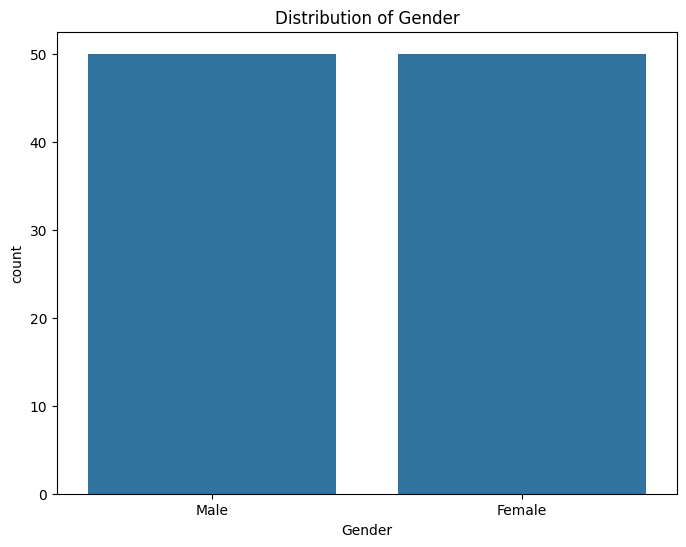

In [ ]:
# Bar chart for categorical data (Gender)
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.show()

In [ ]:
# 2. Chi-Squared Test: Is there an association between Gender and Age group?
chi_squared_test(data, 'Gender', 'Age group')


--- Chi-Squared Test ---
Contingency Table:
Age group  Adult  Child  Elderly
Gender                          
Female        32      9        9
Male          27     15        8
Chi-squared Statistic: 1.9826
P-value: 0.3711
Degrees of Freedom: 2
Expected Frequencies:
[[29.5 12.   8.5]
 [29.5 12.   8.5]]
Conclusion: Fail to reject the null hypothesis. There is not enough evidence to suggest an association.


(np.float64(1.9825523429710867),
 np.float64(0.37110279789303563),
 2,
 array([[29.5, 12. ,  8.5],
        [29.5, 12. ,  8.5]]))

<Figure size 800x600 with 0 Axes>

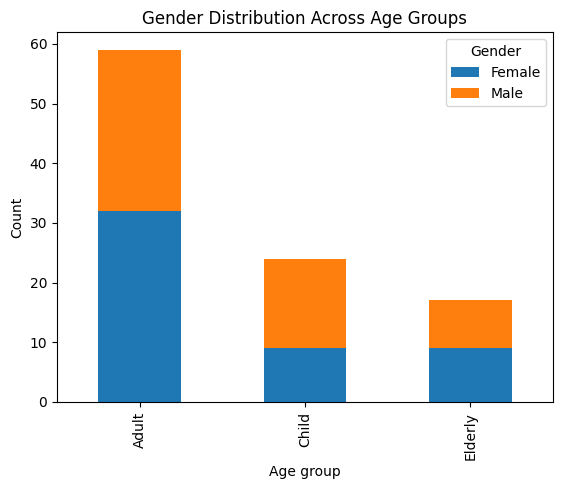

In [ ]:
# Stacked bar chart for two categorical variables (Gender and Age group)
plt.figure(figsize=(8, 6))
pd.crosstab(data['Age group'], data['Gender']).plot(kind='bar', stacked=True)
plt.title('Gender Distribution Across Age Groups')
plt.ylabel('Count')
plt.show()

In [ ]:
# 3. One-Sample t-test: Is the average height different from 1.7 meters?
one_sample_t_test(data, 'Height', 1.7)


--- One-Sample t-test ---
Sample Mean: 1.6873
Hypothesized Mean: 1.7000
T-statistic: -1.1833
P-value: 0.2395
Conclusion: Fail to reject the null hypothesis.  There is not enough evidence to suggest a significant difference.


(np.float64(-1.1832971984919254), np.float64(0.23952508710907283))

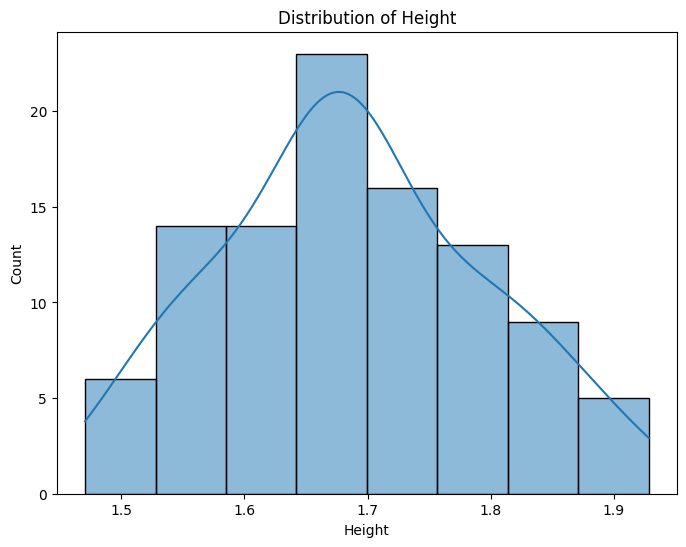

In [ ]:
# Histogram of Height
plt.figure(figsize=(8, 6))
sns.histplot(data['Height'], kde=True) # Added kde=True for a Kernel Density Estimate
plt.title('Distribution of Height')
plt.show()

In [ ]:
# 4. Two-Sample t-test: Is there a difference in height between males and females?
two_sample_t_test(data, 'Height', 'Gender', 'Male', 'Female')


--- Two-Sample t-test ---
Mean of Male: 1.7497
Mean of Female: 1.6250
T-statistic: 7.1604
P-value: 0.0000
Conclusion: Reject the null hypothesis. There is a statistically significant difference in means between the two groups.


(np.float64(7.160429085521937), np.float64(1.5715311453554694e-10))

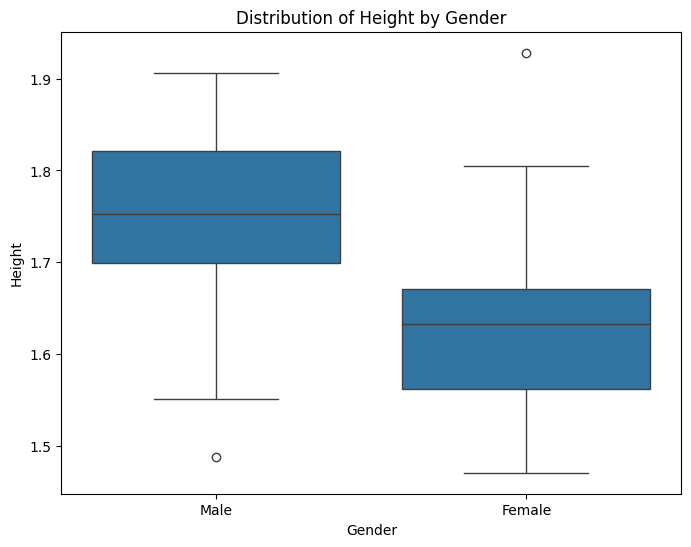

In [ ]:
# Side-by-side box plots (Height by Gender)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Height', data=data)
plt.title('Distribution of Height by Gender')
plt.show()


--- Correlation Test ---
Correlation Coefficient (r): 0.3482
P-value: 0.0004
Conclusion: Reject the null hypothesis. There is a statistically significant linear relationship between the variables.


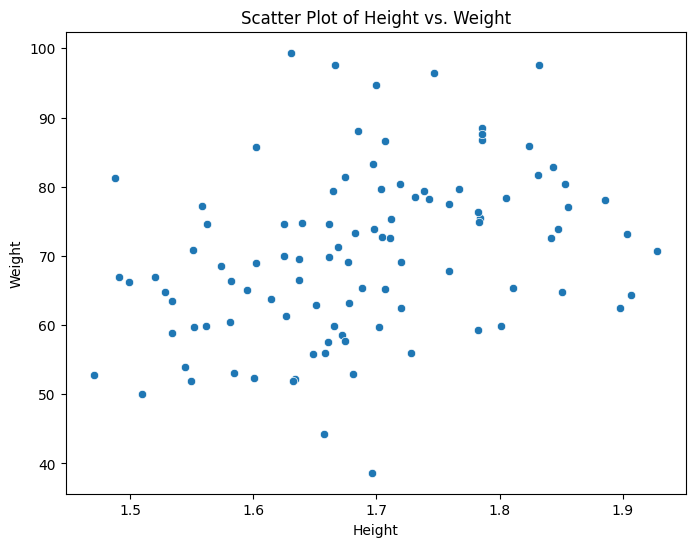

(np.float64(0.34823168419907835), np.float64(0.00038473546841362915))

In [ ]:
# 5. Correlation Test:  Is there a relationship between height and weight?
correlation_test(data, 'Height', 'Weight')

# Use web apps

Expor the data as a CSV file analyse the data using  the web apps of https://artofstat.com/web-apps

In [ ]:
# Export to CSV
data.to_csv('myData.csv', index=False)